 ╔══<i><b>&nbsp;Alai-DeepLearning&nbsp;</b></i>═══════════════════════════╗
###  &nbsp;&nbsp; **✎&nbsp;&nbsp;Week 3. Pandas & Matplotlib**
# Section 6. Matplotlib을 통한 다양한 시각화
Algorithm AI, last updated at 2019/03/06 (Wed) by PAI

### _Objective_
1. *전달하고자 하는 데이터와 분석 결과에 따라 더 좋은 시각화 방법들이 존재합니다.*<br>
2. *우리는 명확하고 효율적인 의미 전달을 위해 타당한 시각화 방법을 결정해야합니다.*<br>
2. *plot 외에 막대그래프, 원그래프, 산포도 등을 다양한 시각화 그래프를 그려봅니다. *<br>
  
╚════════════════════════════════════════╝

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

### [Optional. 시각화에서 한글 사용하기]

---

> _`matplotlib` 패키지는 기본적으로 한글을 지원하지 않습니다._<br> 
> _만약 `matplotlib`에서 폰트설정 없이 한글을 사용하려 한다면 글자가 깨져서 알수 없는 문자가 출력될 것입니다._<br>
> _한글로 시각화를 하기 위해서는 아래와 같은 순서로 한글 폰트를 설치 후 세팅하는 작업이 필요합니다._

In [0]:
# 1. 나눔 폰트를 다운받기
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [0]:
import matplotlib.font_manager as fm
# 2. 나눔 폰트의 위치 가져오기 
system_font = fm.findSystemFonts() # 현재 시스템에 설치된 폰트
nanum_fonts = [font for font in system_font if "NanumBarunGothic.ttf" in font]
font_path = nanum_fonts[0] # 설정할 폰트의 경로

# 3. 나눔 폰트로 설정하기
font_name = fm.FontProperties(fname=font_path, size=10).get_name()
plt.rc("font",family=font_name)

# 4. 폰트 재설정하기
fm._rebuild()

# 5. (optional) minus 기호 깨짐 방지
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

##  예제 데이터 Ⅰ )  학생들의 국영수사과 성적표



#### 데이터 1) 중간고사, 학생들의 국영수사과 성적표

`middle_scores`

| 학생 번호 | 국어 | 영어 | 수학 | 사회 | 과학 |
|  ----   | --- |---| --- | --- | --- |
|0 |80 |92 |70 | 65 | 92 |
|1 |91 |75 |90 | 68 | 85 | 
|2 |86 |76 |42 | 72 | 88 |
|3 |77 |92 |52 | 60 | 80 |
|4 |75 |85 |85 | 92 | 95 |
|5 |96 |90 |95 | 81 | 72 |


#### 데이터 2) 기말고사, 학생들의 국영수사과 성적표
`final_scores`

| 학생 번호 | 국어 | 영어 | 수학 | 사회 | 과학 |
|  ----   | --- |---| --- | --- | --- |
|0 |85 |95 |90 | 66 | 93 |
|1 |93 |70 |80 | 60 | 81 | 
|2 |89 |78 |55 | 75 | 80 |
|3 |80 |94 |59 | 72 | 90 |
|4 |70 |82 |81 | 95 | 72 |
|5 |90 |76 |93 | 82 | 89 |

In [0]:
middle_scores = np.array([
    [80,92,70,65,92],
    [91,75,90,68,85],
    [86,76,42,72,88],
    [77,92,52,60,80],
    [75,85,85,92,95],
    [96,90,95,81,72]
])

final_scores = np.array([
    [85,95,90,66,93],
    [93,70,80,60,81],
    [89,78,55,75,80],
    [80,94,59,72,90],
    [70,82,81,95,72],
    [90,76,93,82,89]
])

scores = np.stack([middle_scores,final_scores])

scores

array([[[80, 92, 70, 65, 92],
        [91, 75, 90, 68, 85],
        [86, 76, 42, 72, 88],
        [77, 92, 52, 60, 80],
        [75, 85, 85, 92, 95],
        [96, 90, 95, 81, 72]],

       [[85, 95, 90, 66, 93],
        [93, 70, 80, 60, 81],
        [89, 78, 55, 75, 80],
        [80, 94, 59, 72, 90],
        [70, 82, 81, 95, 72],
        [90, 76, 93, 82, 89]]])

## 1. 막대그래프(Bar Chart)

---

+ 막대차트는 분류간(계열간) 크기 비교에 유용한 시각화 방법입니다.<br>
+ 주로 범주형자료를 기준으로 연속형 값을 가지는 데이터의 시각화에 사용됩니다.<br>
+ 차지하고 있는 크기의 비율이나 분포를 나타내기에는 유용하지 않을 수 있습니다.<br>

`plt.bar(x, height)`<br>
`plt.barh(y, width)`

### 예제 1) 과목별 평균 점수 

┌─<i> ✍︎ Example  </i>────────────────────────────────────┐ <br>

&nbsp;&nbsp;&nbsp;&nbsp;중간고사 때 학생들의 평균 성적은 과목별로 얼마나 차이나는지 확인하는 시각화를 해봅시다.<br>

└───────────────────────────────────────────┘<br>

중간고사 때의 과목 별 평균 성적은 얼마인가?

In [0]:
middle_avg_subject = middle_scores.mean(axis=0) # 중간고사 때 과목 별 평균 성적

#### ⓵ 수직 막대그래프 그리기

> 1. `plt.bar(x, height)` : 각각의 `x` 를 항목으로 `height` 높이의 수직 막대그래프를 그립니다.<br>

>> `x`가 숫자로 구성된 list의 경우 : 
>> 1. 각 요소의 값들은 항목이름이자, 순서 및 위치를 의미합니다.  <br>

>> `x`가 문자열로 구성된 list의 경우 :
>> 1. 각 요소의 Value ➡︎ 항목 이름
>> 2. 각 요소의 Index ➡︎ 막대의 순서 및 위치
>>를 의미합니다.

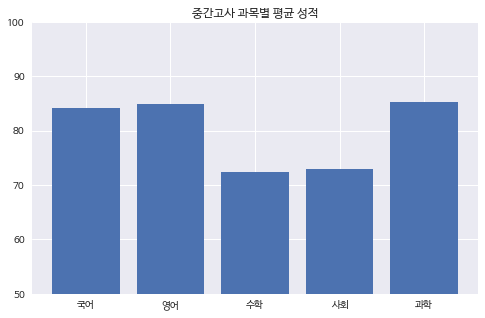

In [0]:
xs = ["국어","영어","수학","사회","과학"] # x가 문자열로 구성된 list ⇨ Value : 항목이름, Index : 막대의 순서 및 위치

plt.figure(figsize=(8,5))

plt.bar(x=xs,
        height=middle_avg_subject) # 다섯개 항목에 대한 수직 막대그래프를 그립니다.
                                   # x : 다섯개 항목로 나누어진 데이터
                                   # height : 막대의 높이는 각 항목별 평균 성적

plt.title("중간고사 과목별 평균 성적")
plt.ylim(50,100)
plt.show()

#### ⓶ 수평 막대그래프 그리기

> 1. `plt.barh(y, width)` : 각각의 `y` 를 항목으로 `width` 너비의 수평 막대그래프를 그립니다.


>> `y`가 숫자로 구성된 list의 경우 : 
>> 1. 각 요소의 값들은 항목이름이자, 순서 및 위치를 의미합니다.  <br>

>> `y`가 문자열로 구성된 list의 경우 :
>> 1. 각 요소의 Value ➡︎ 항목 이름
>> 2. 각 요소의 Index ➡︎ 막대의 순서 및 위치
>>를 의미합니다.

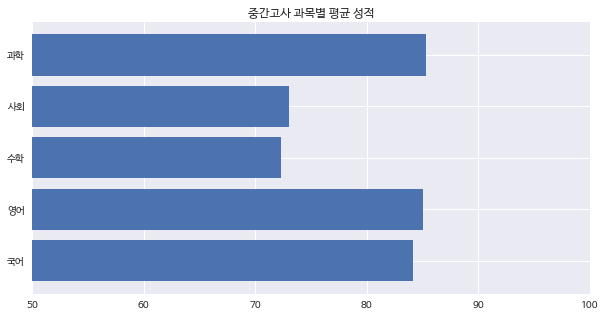

In [0]:
ys = ["국어","영어","수학","사회","과학"] # y가 문자열로 구성된 list ⇨ Value : 항목이름, Index : 막대의 순서 및 위치

plt.figure(figsize=(10,5))

plt.barh(y=ys,
         width=middle_avg_subject) # 다섯개 항목에 대한 수평 막대그래프를 그립니다.
                                   # y : 다섯개 항목으로 나누어진 데이터
                                   # width : 막대의 너비는 각 항목별 평균 성적

plt.title("중간고사 과목별 평균 성적")
plt.xlim(50,100)
plt.show()

### 예제 2) 과목별 평균 점수 

┌─<i> ✍︎ Example  </i>────────────────────────────────────┐ <br>

&nbsp;&nbsp;&nbsp;&nbsp;각 과목별로 중간고사와 기말고사의 평균 성적이 얼마나 차이나는지 확인하는 시각화를 해봅시다.<br>

└───────────────────────────────────────────┘<br>

#### ⓵ 막대그래프로 두가지 범주를 같이 비교하기

범주 기준1 : 과목별 비교<br>
범주 기준2 : 기간(중간고사및 기발고사)의 비교

막대그래프에서 하나의 기준을 추가하여<br>
중간고사 때와 기말고사 때를 같이 비교하고 싶다면, 아래와 같이 할 수 있습니다.

In [0]:
middle_avg_subject = middle_scores.mean(axis=0) # 중간고사 때 과목 별 평균 성적
final_avg_subject = final_scores.mean(axis=0)   # 기말고사 때 과목 별 평균 성적

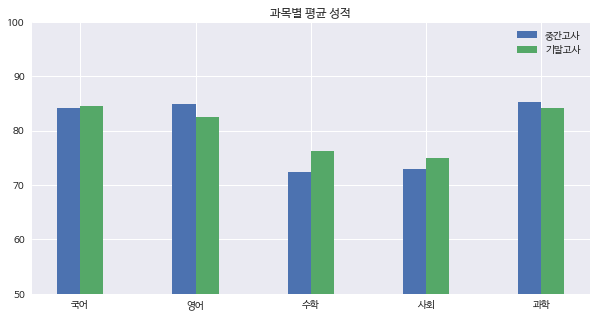

In [0]:
plt.figure(figsize=(10,5))

# 중간고사에 대한 막대그래프 그리기
plt.bar(x=np.arange(0,5)-0.1,      # 막대의 위치 : 왼쪽으로 0.1만큼 이동
        height=middle_avg_subject, # 막대의 높이 : 중간고사의 평균
        width=0.2)                 # 막대의 너비 : 0.2

# 기말고사에 대한 막대그래프 그리기
plt.bar(x=np.arange(0,5)+0.1,      # 막대의 위치 : 오른쪽으로 0.1만큼 이동
        height=final_avg_subject,  # 막대의 높이 : 기말고사의 평균
        width=0.2)                 # 막대의 너비 : 0.2

plt.title("과목별 평균 성적")
plt.xticks(ticks=np.arange(0,5),
           labels=["국어","영어","수학","사회","과학"]) # 각 항목에 대한 이름 설정
plt.ylim(50,100)
plt.legend(["중간고사","기말고사"])
plt.show()

## 2. 원그래프 (Pie Chart)

---

+ 원그래프는 각 항목의 차지하는 비율의 비교에 유용한 시각화 방법입니다.<br>
+ 주로 명목형분류를 기준으로 비율적인 값을 가지는 데이터의 시각화에 사용됩니다.<br>
+ 연속형 자료를 기준으로 분류된 데이터의 시각화에는 유용하지 않을 수 있습니다.

> 1. `plt.pie(x, lebels=)` : x의 각 요소 값이 차지하는 비중을 원형 그래프로 그려줍니다.
>> 이때, 각 항목이 가지는 파이의 크기는 전체 크기의 비율에 해당하게 됩니다.( % )


### 예제 2) 학생의 오답비중

┌─<i> ✍︎ Example </i>────────────────────────────────────────┐ <br>

&nbsp;&nbsp;&nbsp;&nbsp;중간고사 때 0번 학생이 틀린 오답 점수는 과목 별로 비중이 어떻게 되는지 확인하는 시각화를 해봅시다.<br>

└───────────────────────────────────────────────┘<br>



0번째 학생의 과목 별 오답점수의 비중은 얼마나 되는가?

In [0]:
error_score = 100 - middle_scores[0] # 0번째 학생의 오답점수를 계산하여 저장

label_names = np.array(["국어","영어","수학","사회","과학"]) # 각 항목의 이름을 지정

#### ⓵ 파이 그래프 그리기

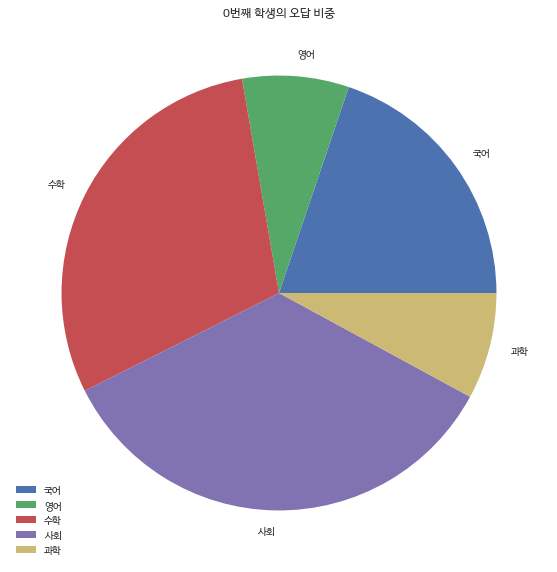

In [0]:
plt.figure(figsize=(10,10))

plt.pie(error_score,labels=label_names) # 모든 오답점수 중 각 과목별 오답점수의 비중으로 원그래프를 그립니다.
                                        # error_scroe : 다섯개 항목으로 나누어진 데이터
                                        # label_names : 각 항목의 이름
plt.title("0번째 학생의 오답 비중")
plt.legend()
plt.show()

#### ⓶ 파이의 순서 정해주기
위의 원그래프는<br>
error_score 데이터의 순서대로 우측 상단부터 반시계방향으로 표현되어있습니다.<br>
전달력을 높이기 위해 error_score의 크기 순으로 순서를 정렬해 봅시다.

> 1.`np.argsort(a)`` : a 의 요소 값의 크기를 기준으로 순서대로하여 각 요소의 위치값(Index)을 array로 반환합니다.

In [0]:
asc_idx = np.argsort(error_score) # error_score의 값 중 가장 작은 값부터 가장 큰 값까지(오름차순)의 위치값(Index)을 순서대로 저장합니다.
asc_idx

array([1, 4, 0, 2, 3])

In [0]:
# 위의 인덱스 기준으로 오답점수와 항목이름을 재정렬을 합니다.
sorted_score = error_score[asc_idx]
sorted_label = label_names[asc_idx]

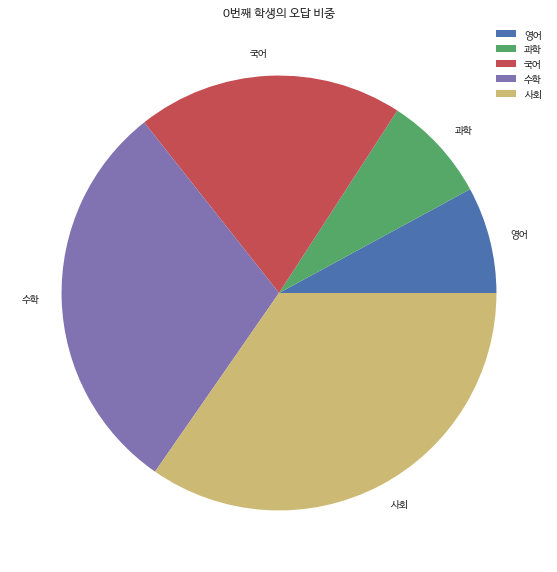

In [0]:
plt.figure(figsize=(10,10))

plt.pie(sorted_score, labels=sorted_label)

plt.title("0번째 학생의 오답 비중")
plt.legend()
plt.show()

## ⌗ 예제 데이터 Ⅱ ) 학생들의 국영수사과 성적표

전교생의 수학/과학 성적이 아래와 같습니다.

#### 데이터 1) 전교생의 수학 점수

```
[62, 80, 68, 61, 69, 62, 71, 84, 68, 71, 60, 72, 69, 78, 64, 73, 67,
68, 58, 69, 64, 72, 59, 56, 60, 60, 78, 63, 68, 72, 72, 72, 70, 73,
68, 55, 77, 73, 81, 71, 68, 63, 76, 76, 66, 70, 72, 67, 74, 66, 77,
75, 68, 60, 71, 74, 78, 78, 69, 75, 71, 79, 75, 88, 81, 74, 85, 73,
64, 78, 81, 68, 70, 62, 60, 69, 62, 81, 77, 85, 66, 68, 63, 81, 80,
71, 78, 61, 70, 68, 69, 57, 64, 64, 65, 74, 69, 60, 75, 69, 66, 62,
60, 75, 71, 63, 79, 62, 86, 86, 81, 74, 65, 71, 81, 67, 75, 77, 52,
65, 68, 64, 60, 56, 67, 58, 83, 50, 77, 74, 76, 69, 69, 65, 64, 76,
64, 74, 77, 66, 62, 46, 54, 69, 59, 55, 64, 71, 60, 95, 66, 76, 77,
70, 61, 88, 55, 89, 76, 78, 68, 65, 65, 75, 79, 61, 65, 71, 81, 79,
72, 77, 85, 58, 74, 83, 62, 77, 58, 61, 60, 74, 76, 64, 61, 63, 71,
81, 57, 74, 75, 62, 59, 58, 53, 69, 83, 58, 58, 58, 65, 62, 73, 64,
53, 75, 63, 64, 69, 75, 56, 61, 63, 72, 59, 54, 71, 66, 83, 72, 64]

```


In [0]:
math_scores = np.array([
       62, 80, 68, 61, 69, 62, 71, 84, 68, 71, 60, 72, 69, 78, 64, 73, 67,
       68, 58, 69, 64, 72, 59, 56, 60, 60, 78, 63, 68, 72, 72, 72, 70, 73,
       68, 55, 77, 73, 81, 71, 68, 63, 76, 76, 66, 70, 72, 67, 74, 66, 77,
       75, 68, 60, 71, 74, 78, 78, 69, 75, 71, 79, 75, 88, 81, 74, 85, 73,
       64, 78, 81, 68, 70, 62, 60, 69, 62, 81, 77, 85, 66, 68, 63, 81, 80,
       71, 78, 61, 70, 68, 69, 57, 64, 64, 65, 74, 69, 60, 75, 69, 66, 62,
       60, 75, 71, 63, 79, 62, 86, 86, 81, 74, 65, 71, 81, 67, 75, 77, 52,
       65, 68, 64, 60, 56, 67, 58, 83, 50, 77, 74, 76, 69, 69, 65, 64, 76,
       64, 74, 77, 66, 62, 46, 54, 69, 59, 55, 64, 71, 60, 95, 66, 76, 77,
       70, 61, 88, 55, 89, 76, 78, 68, 65, 65, 75, 79, 61, 65, 71, 81, 79,
       72, 77, 85, 58, 74, 83, 62, 77, 58, 61, 60, 74, 76, 64, 61, 63, 71,
       81, 57, 74, 75, 62, 59, 58, 53, 69, 83, 58, 58, 58, 65, 62, 73, 64,
       53, 75, 63, 64, 69, 75, 56, 61, 63, 72, 59, 54, 71, 66, 83, 72, 64
])




#### 데이터 2) 전교생의 과학 점수

````
[71, 77, 64, 55, 60, 64, 70, 87, 69, 76, 60, 80, 60, 72, 66, 69, 60,
64, 68, 60, 68, 66, 64, 60, 61, 66, 80, 73, 60, 69, 76, 67, 70, 78,
71, 56, 72, 82, 80, 75, 71, 64, 80, 74, 62, 72, 74, 57, 81, 68, 70,
85, 63, 69, 70, 82, 83, 83, 67, 72, 69, 88, 70, 90, 83, 76, 79, 72,
65, 86, 91, 71, 73, 54, 65, 71, 54, 85, 81, 92, 67, 76, 69, 75, 83,
80, 80, 51, 69, 60, 68, 53, 57, 57, 65, 84, 63, 62, 84, 68, 74, 60,
53, 67, 81, 69, 72, 56, 77, 91, 74, 78, 73, 69, 84, 67, 79, 74, 43,
59, 77, 66, 69, 59, 64, 63, 79, 44, 70, 69, 71, 63, 66, 62, 72, 68,
74, 82, 74, 67, 57, 41, 44, 64, 66, 55, 57, 70, 61, 88, 58, 76, 76,
64, 54, 90, 65, 80, 70, 79, 75, 70, 58, 83, 75, 60, 66, 72, 75, 88,
66, 82, 82, 59, 69, 82, 54, 73, 62, 56, 52, 77, 72, 62, 70, 53, 77,
87, 51, 65, 85, 55, 55, 55, 50, 74, 82, 68, 54, 48, 68, 72, 77, 60,
52, 66, 54, 54, 68, 73, 54, 53, 63, 74, 49, 50, 81, 59, 73, 78, 55]

````

In [0]:
science_scores =  np.array([
       71, 77, 64, 55, 60, 64, 70, 87, 69, 76, 60, 80, 60, 72, 66, 69, 60,
       64, 68, 60, 68, 66, 64, 60, 61, 66, 80, 73, 60, 69, 76, 67, 70, 78,
       71, 56, 72, 82, 80, 75, 71, 64, 80, 74, 62, 72, 74, 57, 81, 68, 70,
       85, 63, 69, 70, 82, 83, 83, 67, 72, 69, 88, 70, 90, 83, 76, 79, 72,
       65, 86, 91, 71, 73, 54, 65, 71, 54, 85, 81, 92, 67, 76, 69, 75, 83,
       80, 80, 51, 69, 60, 68, 53, 57, 57, 65, 84, 63, 62, 84, 68, 74, 60,
       53, 67, 81, 69, 72, 56, 77, 91, 74, 78, 73, 69, 84, 67, 79, 74, 43,
       59, 77, 66, 69, 59, 64, 63, 79, 44, 70, 69, 71, 63, 66, 62, 72, 68,
       74, 82, 74, 67, 57, 41, 44, 64, 66, 55, 57, 70, 61, 88, 58, 76, 76,
       64, 54, 90, 65, 80, 70, 79, 75, 70, 58, 83, 75, 60, 66, 72, 75, 88,
       66, 82, 82, 59, 69, 82, 54, 73, 62, 56, 52, 77, 72, 62, 70, 53, 77,
       87, 51, 65, 85, 55, 55, 55, 50, 74, 82, 68, 54, 48, 68, 72, 77, 60,
       52, 66, 54, 54, 68, 73, 54, 53, 63, 74, 49, 50, 81, 59, 73, 78, 55
])

<br>

## 3. 히스토그램(Histogram)

---

+ 히스토그램은 일정한 구간에서의 데이터의 빈도를 나타내는데 유용한 시각화 방법입니다.
+ 주로 연속적인 값을 가지는 데이터의 분포를 파악할 때 사용됩니다.
+ 막대그래프와 달리 막대의 폭이 "데이터 값의 구간"을, 막대의 길이가 "해당 구간 내 데이터의 빈도"를 의미합니다.

> 1. `plt.hist(x, bins)` : 연속형 자료의 나열인 x를 bins 개의 구간으로 나누어 각 구간별 데이터들의 빈도를 그립니다.

### 예제 3) 성적 분포도(histogram) 그리기

┌─<i> ✍︎ Example </i>────────────────────────────────────────┐ <br>

&nbsp;&nbsp;&nbsp;&nbsp;전교생의 수학, 과학 점수의 분포를 알아볼 수 있는 시각화를 해봅시다.<br>

└───────────────────────────────────────────────┘<br>


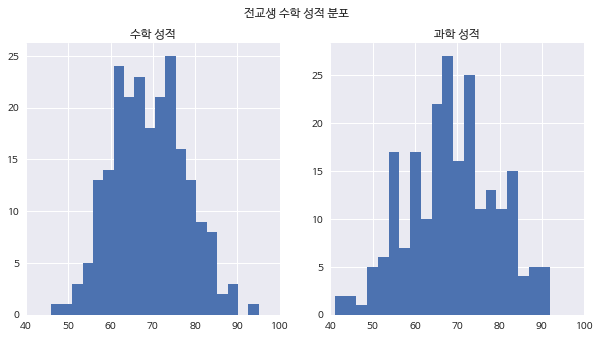

In [0]:
fig = plt.figure(figsize=(10,5))

ax = fig.add_subplot(1,2,1)
ax.hist(math_scores, bins=20)    # 수학 점수를 최소값부터 최대값까지 20구간으로 나누어 히스토그램을 그림
ax.set_title("수학 성적")
ax.set_xlim(40,100)

ax = fig.add_subplot(1,2,2)
ax.hist(science_scores, bins=20) # 과학 점수를 최소값부터 최대값까지 20구간으로 나누어 히스토그램을 그림
ax.set_title("과학 성적")
ax.set_xlim(40,100)

plt.suptitle("전교생 수학 성적 분포")
plt.show()

## 4. 산포도(scatter)

---


+ 산포도는 각 계열을 축으로 하여 각각의 데이터를 해당위치 점으로 표현합니다.
+ 주로 두 가지 연속형 자료의 상관관계를 파악할 때 사용됩니다.
+ 빈도또는 비율 등 통계적 수치가 아닌 데이터의 위치를 모두 표현할 때 유용합니다,

> 1. `plt.scatter(x,y)` : 연속형 자료인 x 와 연속형 자료인 y 를 각각의 축으로 산포도를 그립니다.

### 예제 4) 전교생의 수학 점수와 과학 점수 관련도

┌─<i> ✍︎ Example </i>────────────────────────────────────────┐ <br>

&nbsp;&nbsp;&nbsp;&nbsp;전교생의 수학, 과학 점수의 서로 어떠한 연관성이 있는지 산포도를 통해 알아봅시다.<br>

└───────────────────────────────────────────────┘<br>

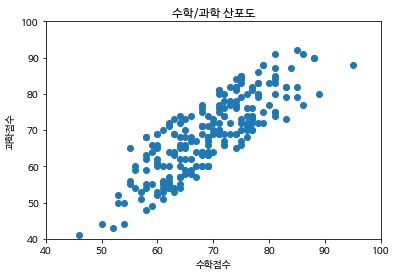

In [0]:
plt.scatter(x=math_scores,    # x : 수학점수를 x 축으로
            y=science_scores) # y : 과학점수를 y 축으로 산포도를 그림
                             

plt.title("수학/과학 산포도")
plt.xlabel("수학점수")
plt.ylabel("과학점수")
plt.xlim(40,100)
plt.ylim(40,100)
plt.show()

## 5. 누적 영역 그래프(Stack area plot)

---


+ 누적영역그래프는 각 시점별로 각 계열들의 분포를 색상으로 나타낸 그래프입니다.
+ 주로 시점이 변화함에 따라 분포가 변하는 데이터를 계열별로 비교할 때 사용됩니다.

> 1. `plt.stack(x,data=)` : x 를 시점으로하여  data 가 가진 값들을 축적하여 누적영역그래프를 그립니다.

### 예제 5) 학생의 국영수 변화 그래프

학생의 성적이 아래와 같이 주어졌을 때, 국영수 전체의 변화 양상을 도식화해보시오.

|과목| 1학기 중간 | 1학기 기말 | 2학기 중간 | 2학기 기말 | 3학기 중간 | 3학기 기말 | 
|---|---|---|---|---|---|---|---|
|국어| 83 | 85 | 84 | 81 | 80 | 85 |
|영어| 86 | 90 | 91 | 89 | 92 | 90 |
|수학| 73 | 78 | 82 | 87 | 92 | 96 |

In [0]:
# 성적 정보
lang_score = [83,85,84,81,80,85]
eng_score =  [86,90,91,89,92,90]
math_score = [73,78,82,87,92,96]

scores = np.stack([lang_score, eng_score, math_score])
scores

array([[83, 85, 84, 81, 80, 85],
       [86, 90, 91, 89, 92, 90],
       [73, 78, 82, 87, 92, 96]])

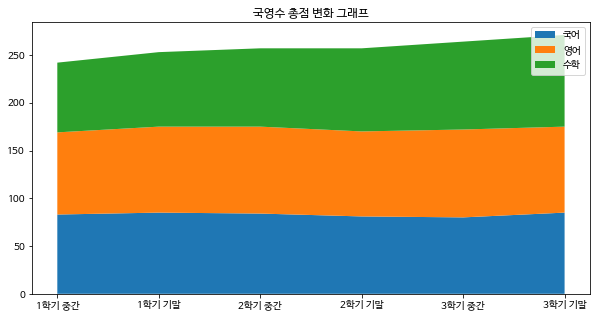

In [0]:
plt.figure(figsize=(10, 5))

plt.stackplot(["1학기 중간","1학기 기말","2학기 중간",
                 "2학기 기말","3학기 중간","3학기 기말"], # 각 시험을 x의 label 로 나타냅니다.
              scores)                              # 각각의 점수를 시점별로 시각화합니다.

plt.title("국영수 총점 변화 그래프")
plt.legend(["국어","영어","수학"])
plt.show()

#  

---

    Copyright(c) 2019 by Public AI. All rights reserved.
    Writen by PAI, SangJae Kang ( rocketgrowthsj@publicai.co.kr )  last updated on 2019/03/07

---